In [10]:
# implemented originally by group 53: @hry625 hry87625@gmail.com
# adapted by group 41: 
    # @Marble879 <younisakel879@gmail.com>
    # @iachella <gusiacgi@student.gu.se>


In [11]:
# import lib
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton
import glob

In [12]:
m = morton.Morton(dimensions=2, bits=18)
def set_value(data,key1,key2):    
    return m.pack(round(data[key1]), round(data[key2]))


In [13]:
def load_data_encode_with_morton(fileName,key1,key2,ts_key,offset1=0,offset2=0,multiplier1=1,multiplier2=1):
    df = pd.read_csv(fileName, sep=';', usecols = [ts_key,key1,key2])
    df=df.dropna()
    df[key1+'modified']=df[key1].add(offset1)
    df[key2+'modified']=df[key2].add(offset2)
    df[key1+'modified']=df[key1+'modified'].multiply(multiplier1)
    df[key2+'modified']=df[key2+'modified'].multiply(multiplier2)
    
    df['morton']=df.apply(set_value,args=(key1+'modified',key2+'modified'),axis=1)
    return df


In [14]:
def load_data_encode_with_morton_m_a(fileName,key1,key2,ts_key,offset1=0,offset2=0,multiplier1=1,multiplier2=1):
    df = pd.read_csv(fileName, sep=';', usecols = [ts_key,key1,key2])
    df=df.dropna()
    df[key1+'modified']=df[key1].multiply(multiplier1)
    df[key2+'modified']=df[key2].multiply(multiplier2)
    df[key1+'modified']=df[key1+'modified'].add(offset1*multiplier1)
    df[key2+'modified']=df[key2+'modified'].add(offset2*multiplier2)
    df['morton']=df.apply(set_value,args=(key1+'modified',key2+'modified'),axis=1)
    return df

In [15]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15),sharex='all')    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=0.5)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1


In [16]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=1)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        sfc_list.append(ax[row_position,column_position])
        ax[row_position,column_position+1].plot(df[key1],df[ts_key],df[key2],df[ts_key])
        ax[row_position,column_position+1].invert_yaxis()
        original_list.append(ax[row_position,column_position+1])
        if not (row_position==0 and column_position==0):
            ax[row_position,column_position].sharex(ax[0,0])
            ax[row_position,column_position+1].sharex(ax[0,1])
        column_position=column_position+2
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
   


In [17]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='black',s=2)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        secax=ax[row_position,column_position].twiny()
        secax.plot(df[key1],df[ts_key],df[key2],df[ts_key])
        original_list.append(secax)
        sfc_list.append(ax[row_position,column_position])
        if not(row_position==0 and column_position==0):
            secax.sharex(original_list[0])
            ax[row_position,column_position].sharex(sfc_list[0])
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
   


In [18]:
LaneChange_Path_5hz='./data/lane_changes/5hz/'
LaneChange_Path_10hz='./data/lane_changes/10hz/'
LaneChange_Path_20hz='./data/lane_changes/20hz/'
LaneChange_Update_Path='./data/lane_changes_updated/'

In [19]:
def get_data_infomation(filePath,key1,key2):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    result=[]
    for file in csv_files:
        df = pd.read_csv(file, sep=';', usecols = [key1,key2])
        df=df.dropna()
        result.append([file,df[key1].median(),df[key1].max(),df[key1].min(),df[key2].median(),df[key2].max(),df[key2].min(),max(df[key1].max(),df[key2].max()),min(df[key1].min(),df[key2].min()),max(df[key1].max(),df[key2].max())-min(df[key1].min(),df[key2].min())])
        data_info_df=pd.DataFrame(result,columns=[file,key1+'_median',key1+'_max',key1+'min',key2+'_median',key2+'_max',key2+'min','pair_max','pair_min','max_min_distance'])
    return data_info_df

In [20]:
info_5hz=get_data_infomation(LaneChange_Path_10hz,'accel_lon','accel_trans')
offset_5hz_lowboundry=min(info_5hz['pair_min'])
offset_5hz_lowboundry

-4.484205

In [21]:
offset_5hz=16

In [22]:
info_10hz=get_data_infomation(LaneChange_Path_10hz,'accel_lon','accel_trans')
offset_10hz_lowboundry=min(info_10hz['pair_min'])
offset_10hz_lowboundry

-4.484205

In [23]:
info_20hz=get_data_infomation(LaneChange_Update_Path,'accel_lon','accel_trans')
offset_20hz_lowboundry=max(info_20hz['max_min_distance'])
offset_20hz_lowboundry

9.782024

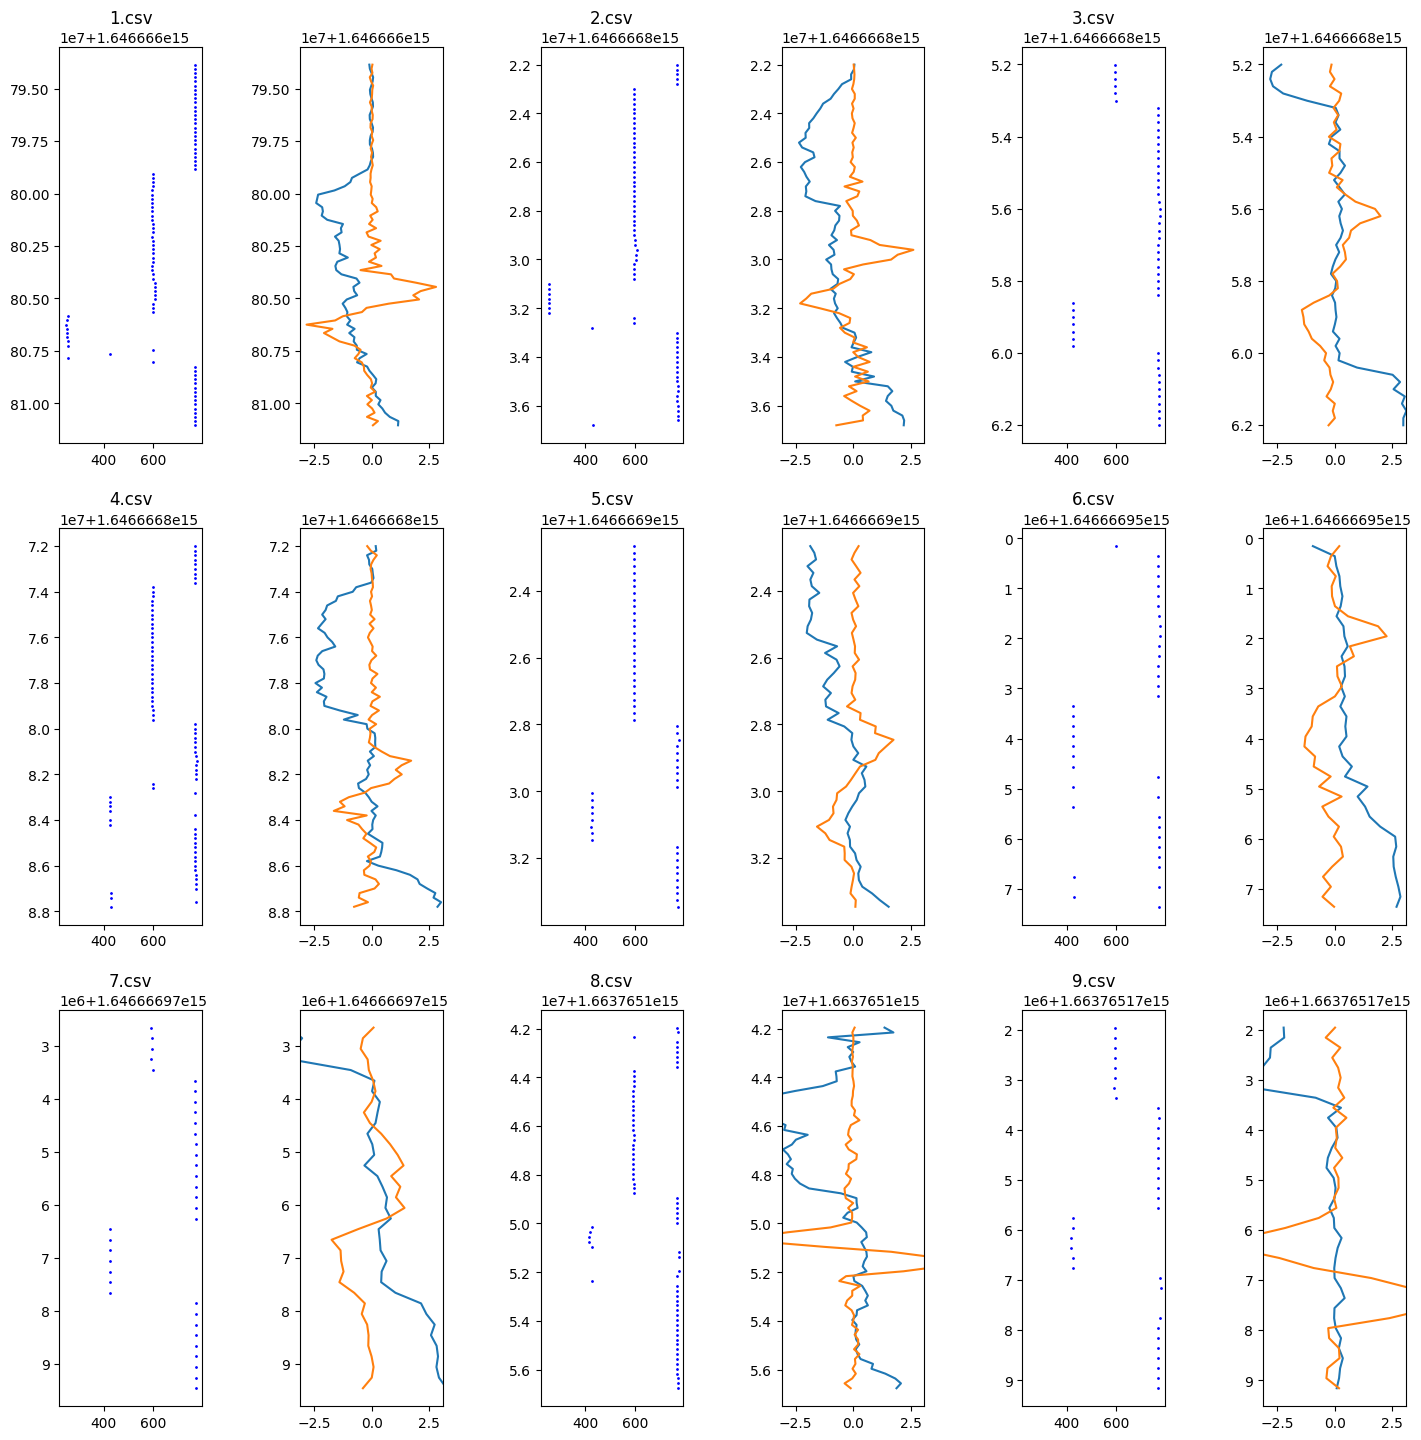

In [24]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

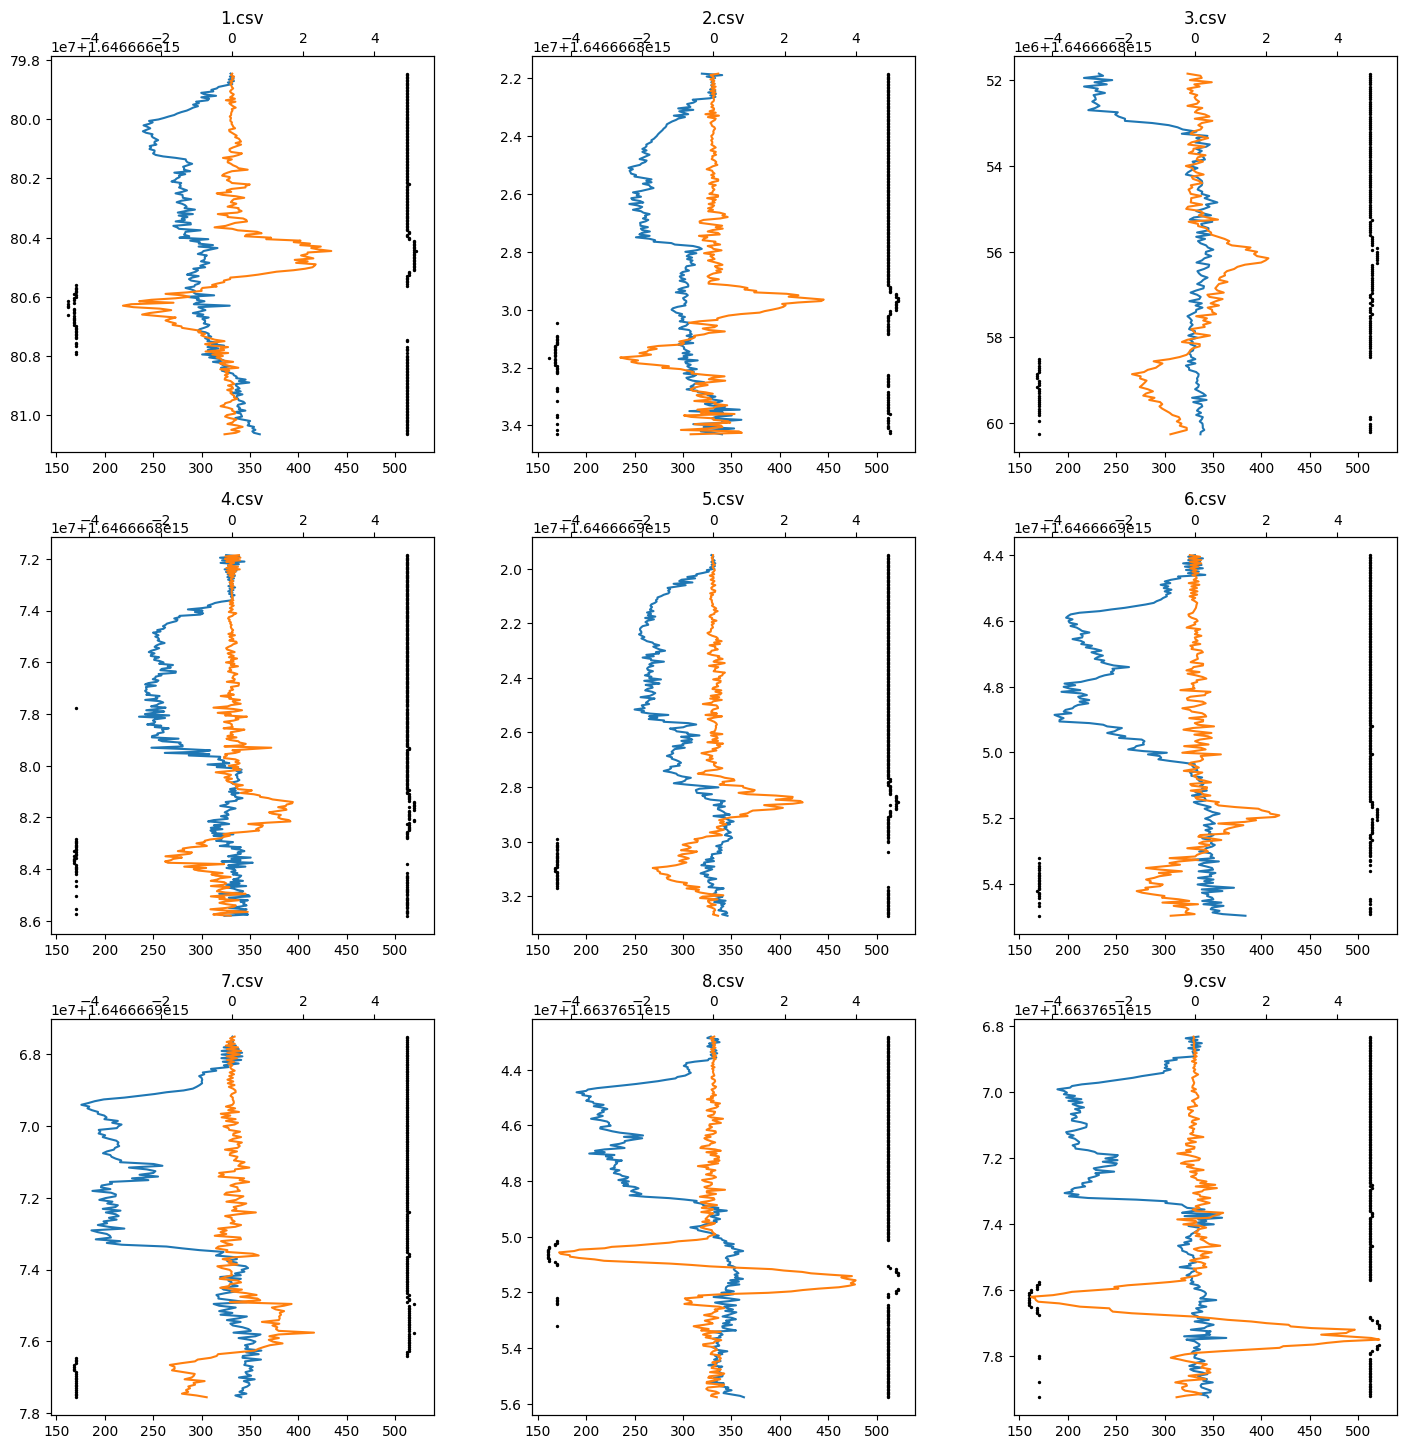

In [25]:
# only take accel_trans in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,0,1,3,3)

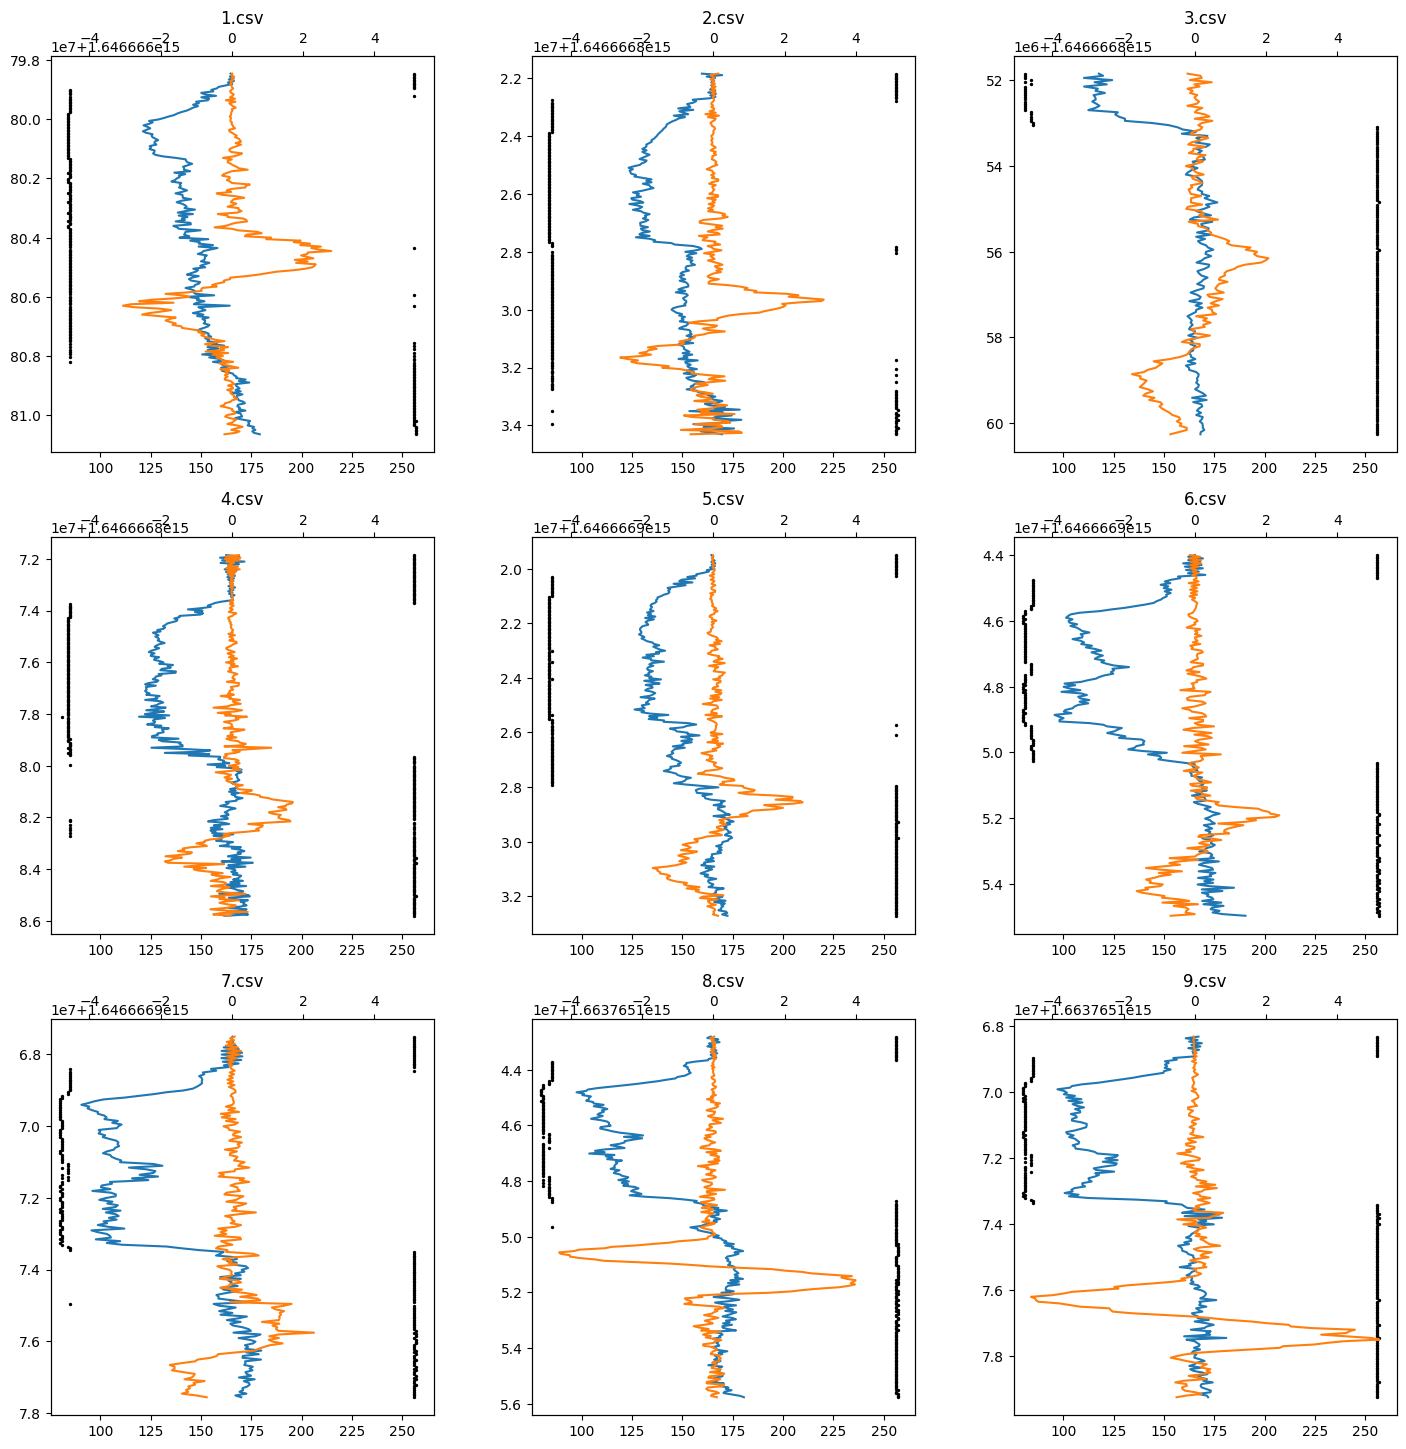

In [26]:
# only take accel_lon in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,0,3,3)

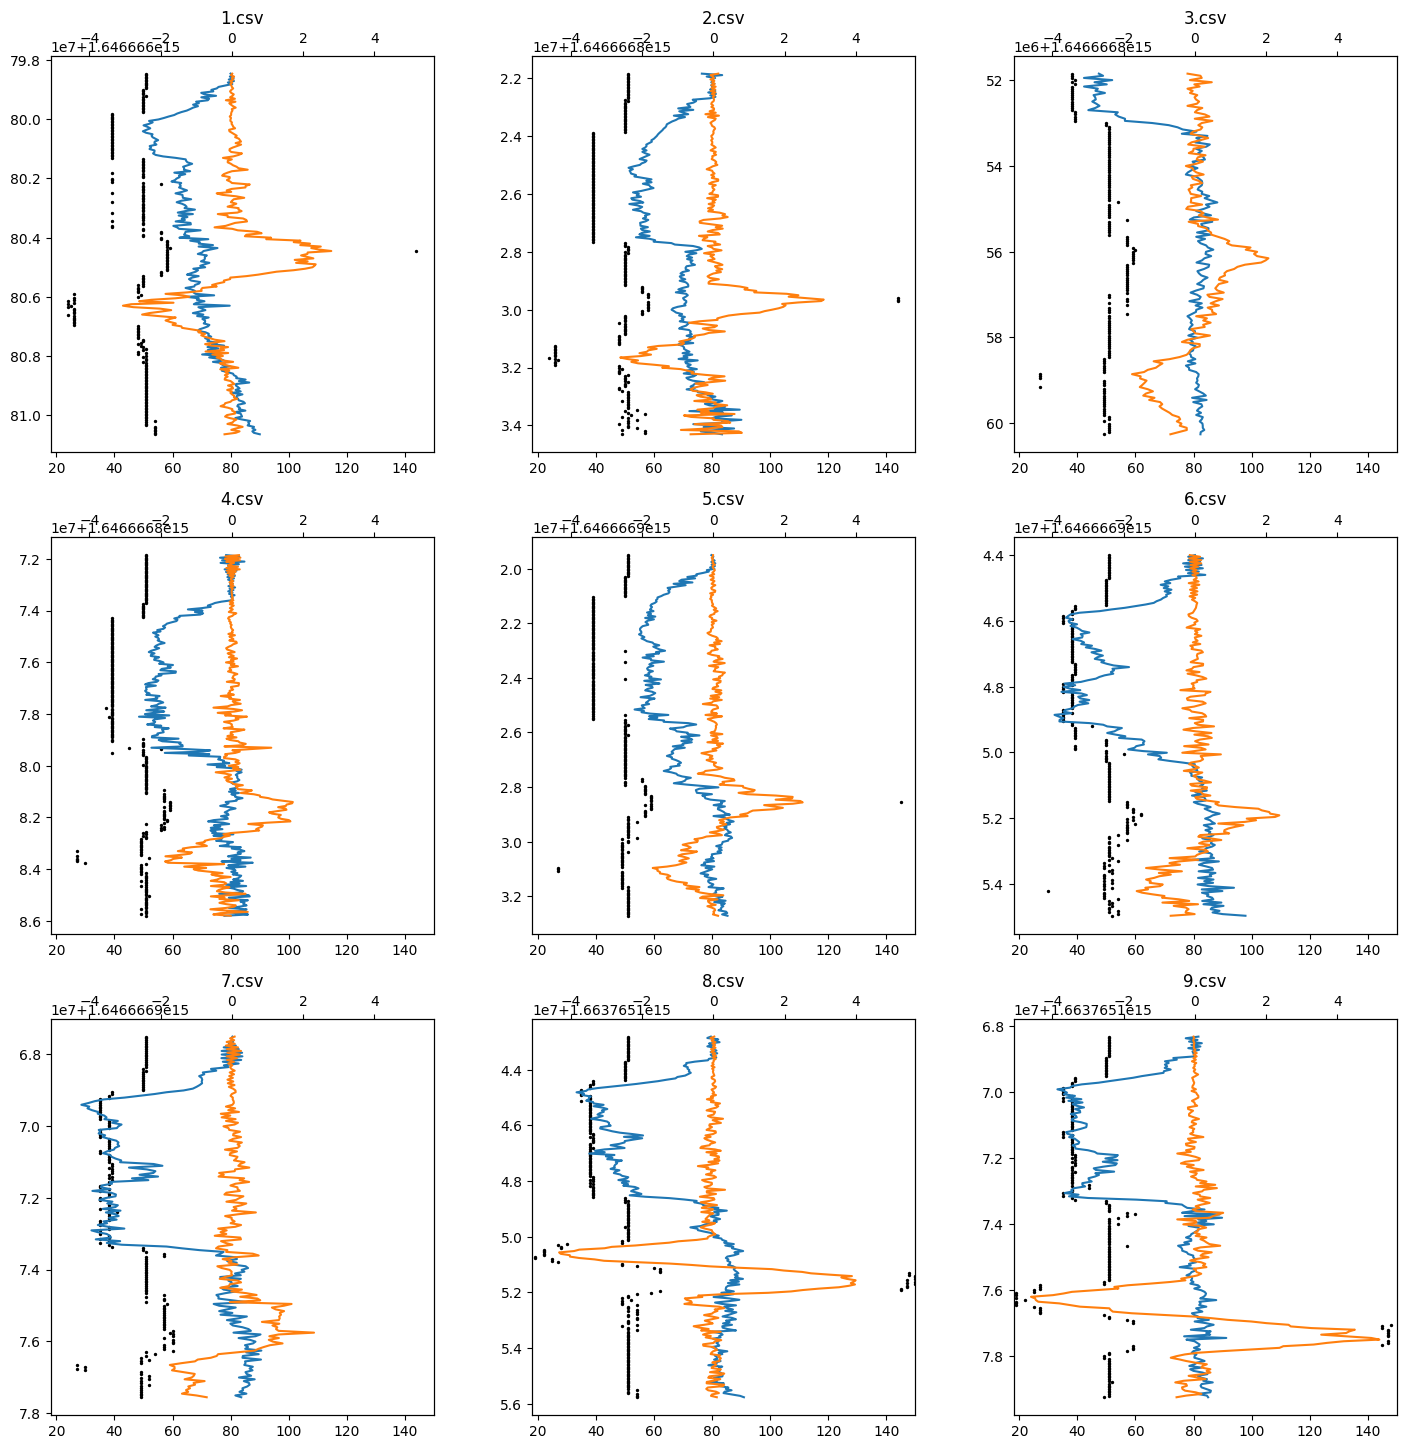

In [27]:
# only take accel_trans in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',5,5,1,1,3,3)

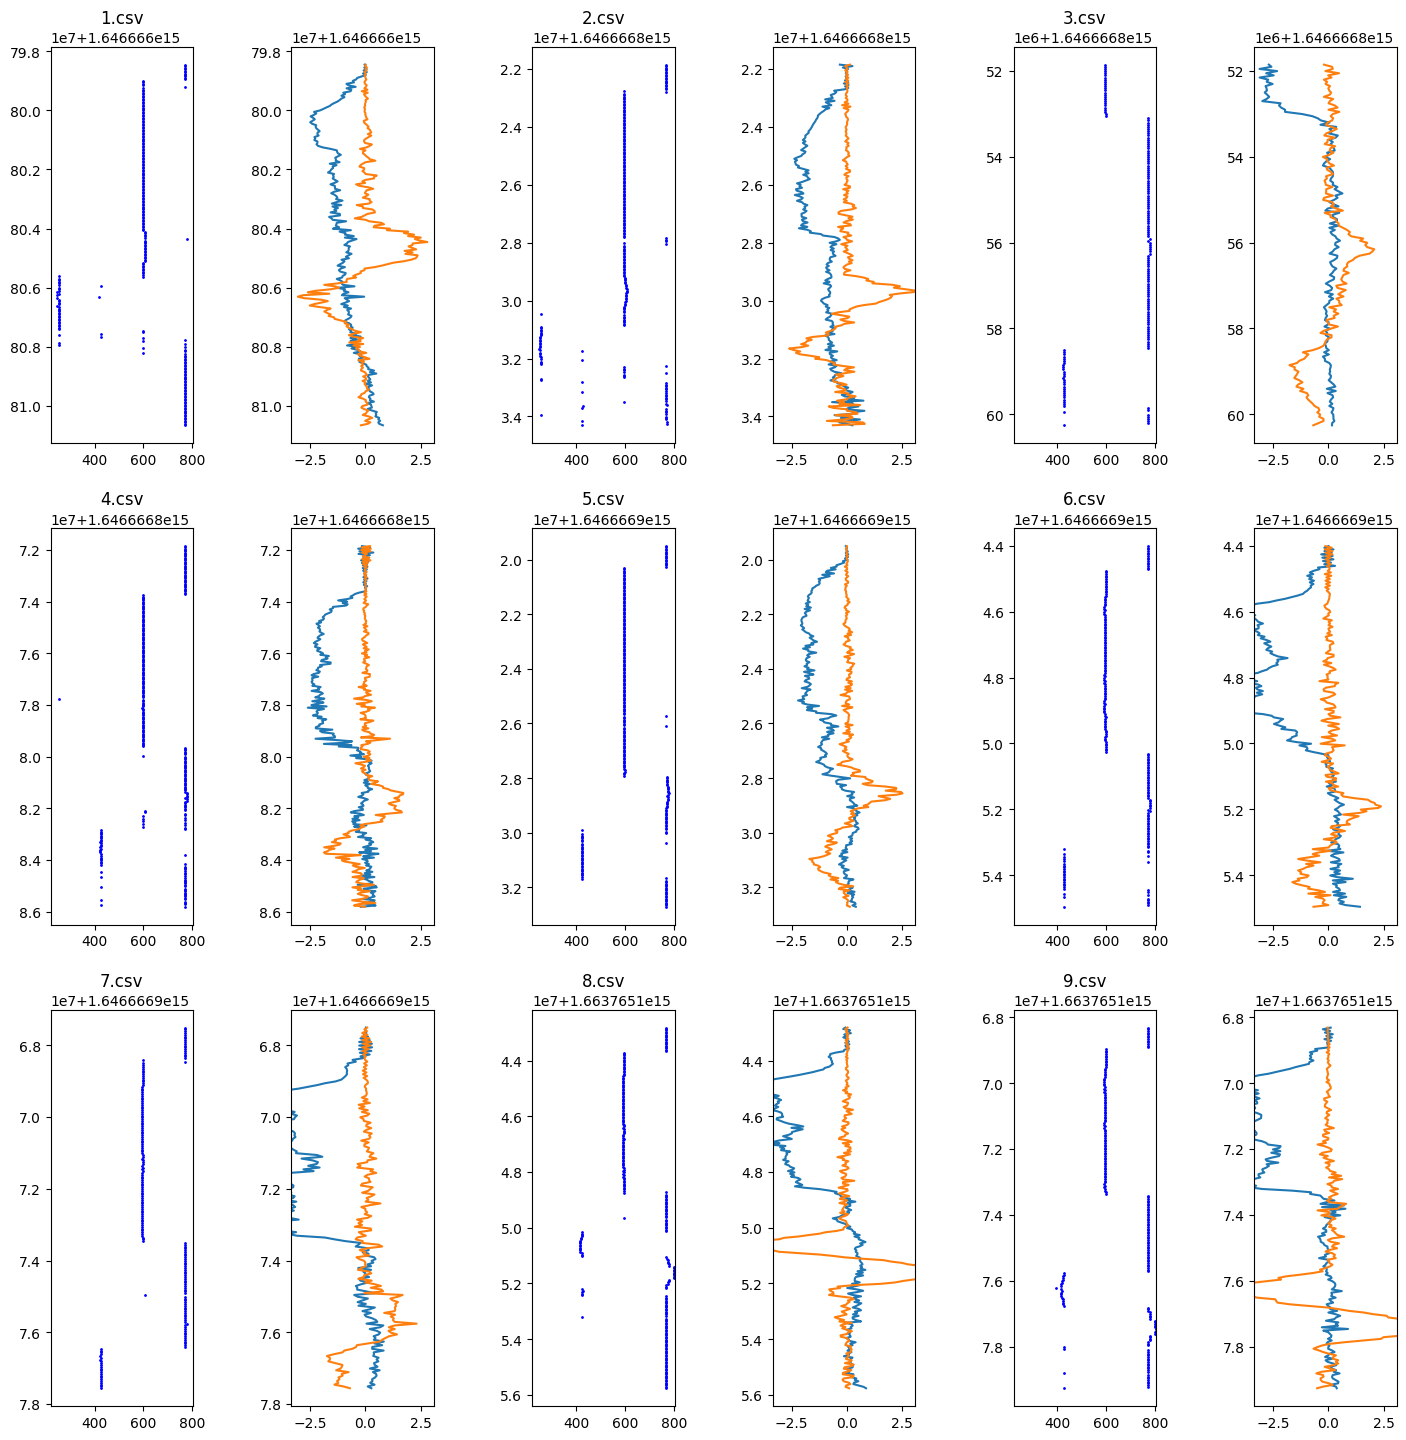

In [28]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

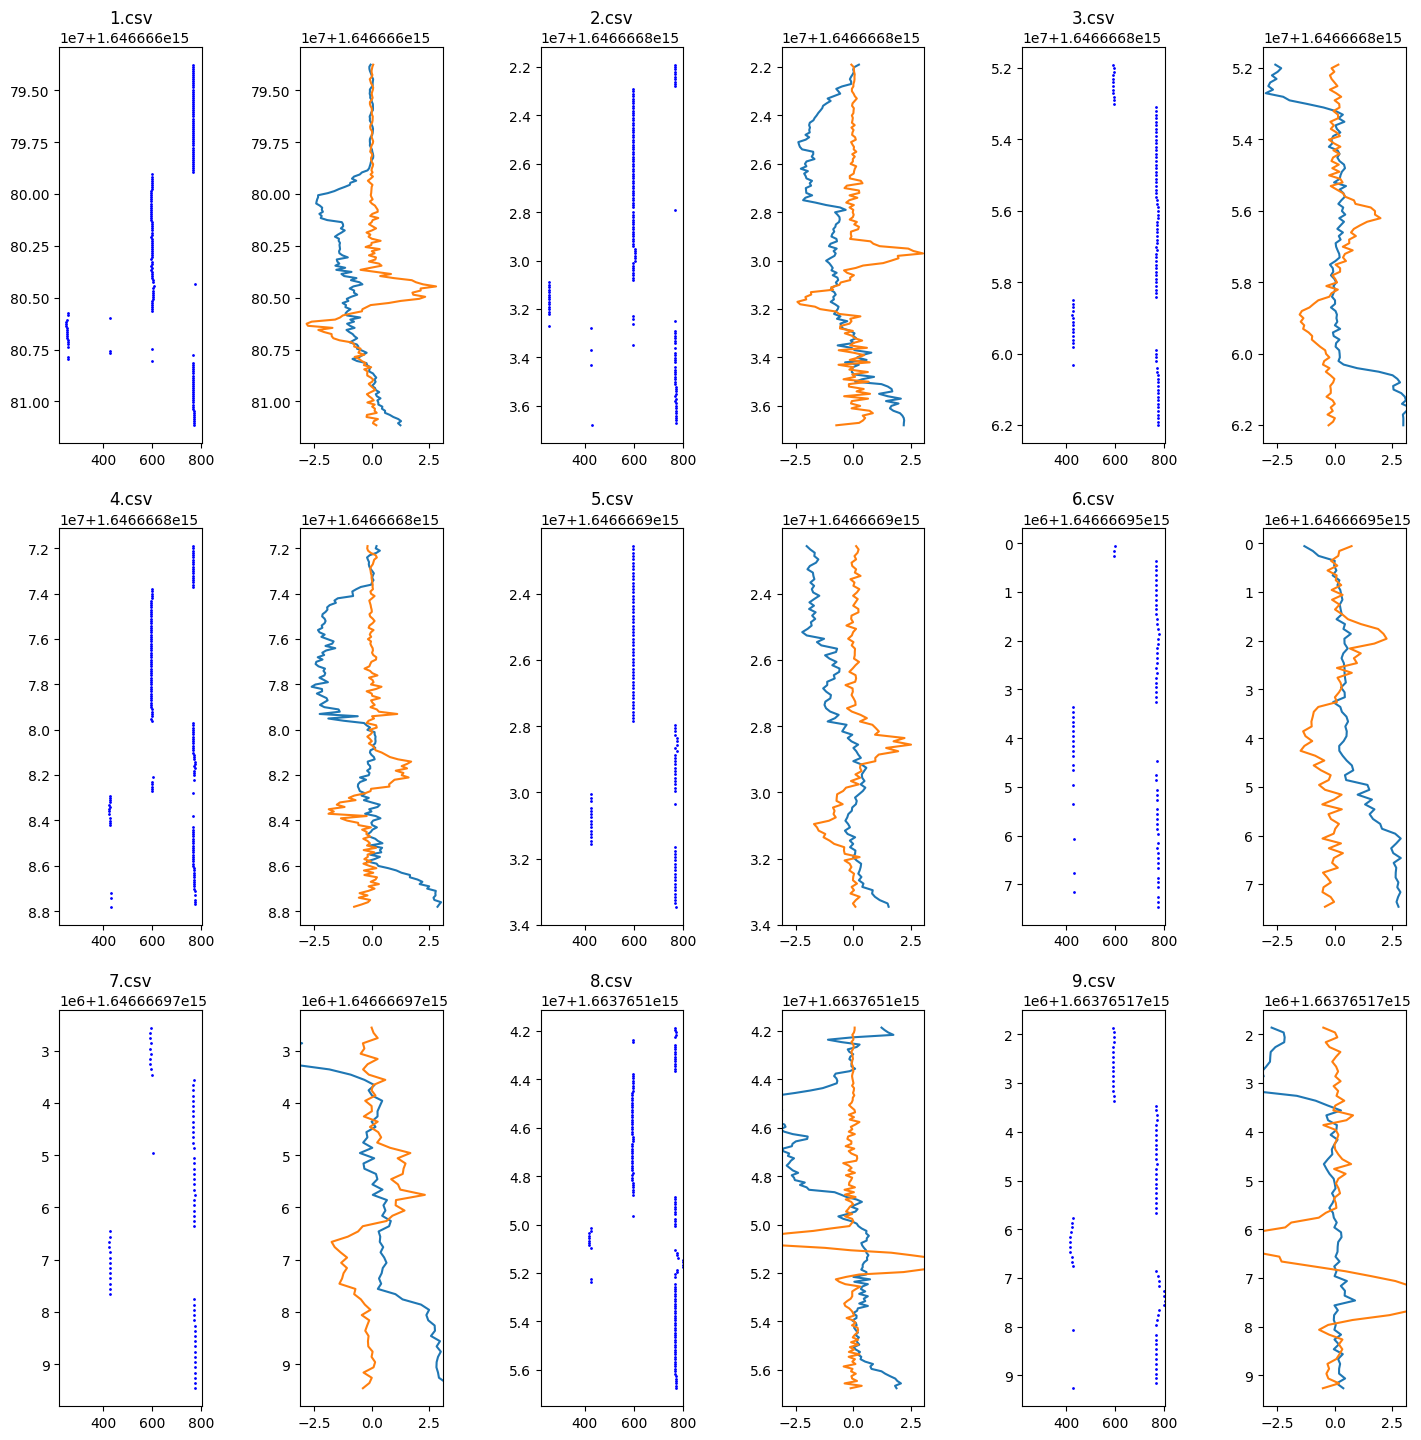

In [29]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_10hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

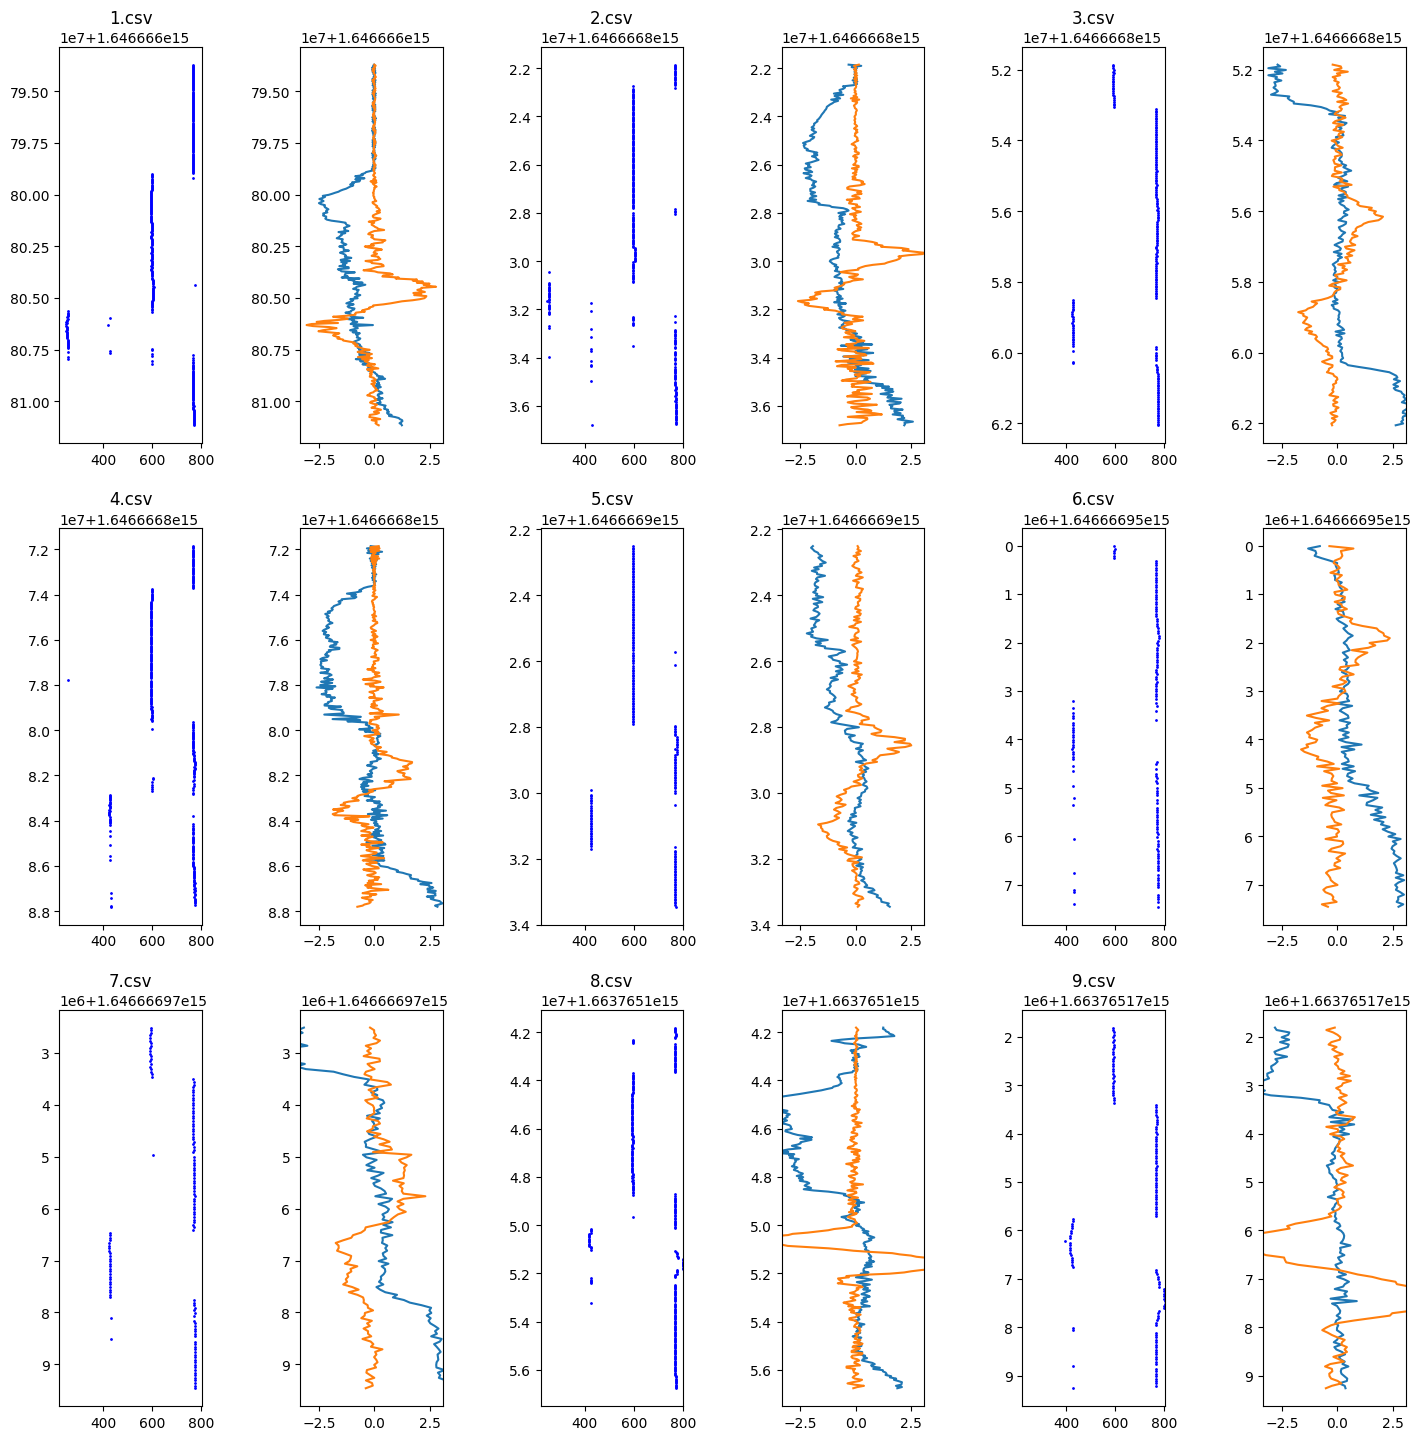

In [30]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_20hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

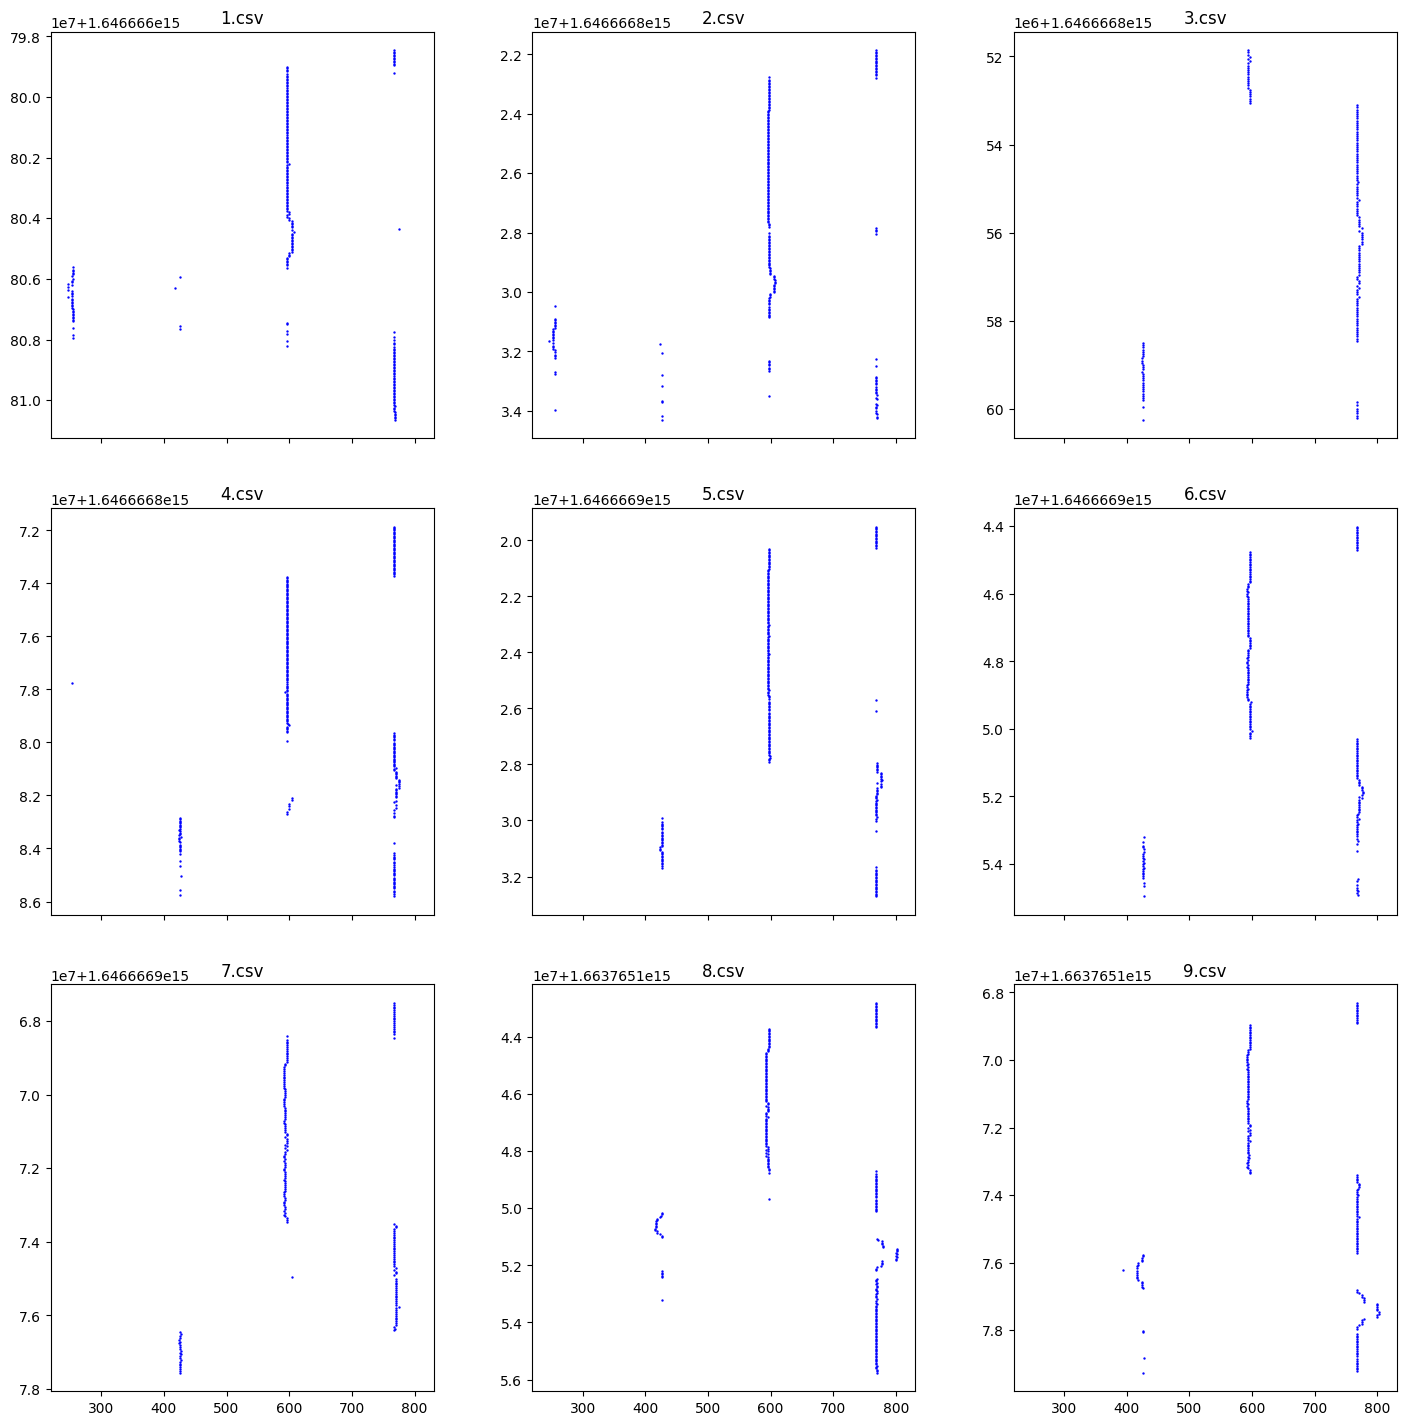

In [31]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,3)

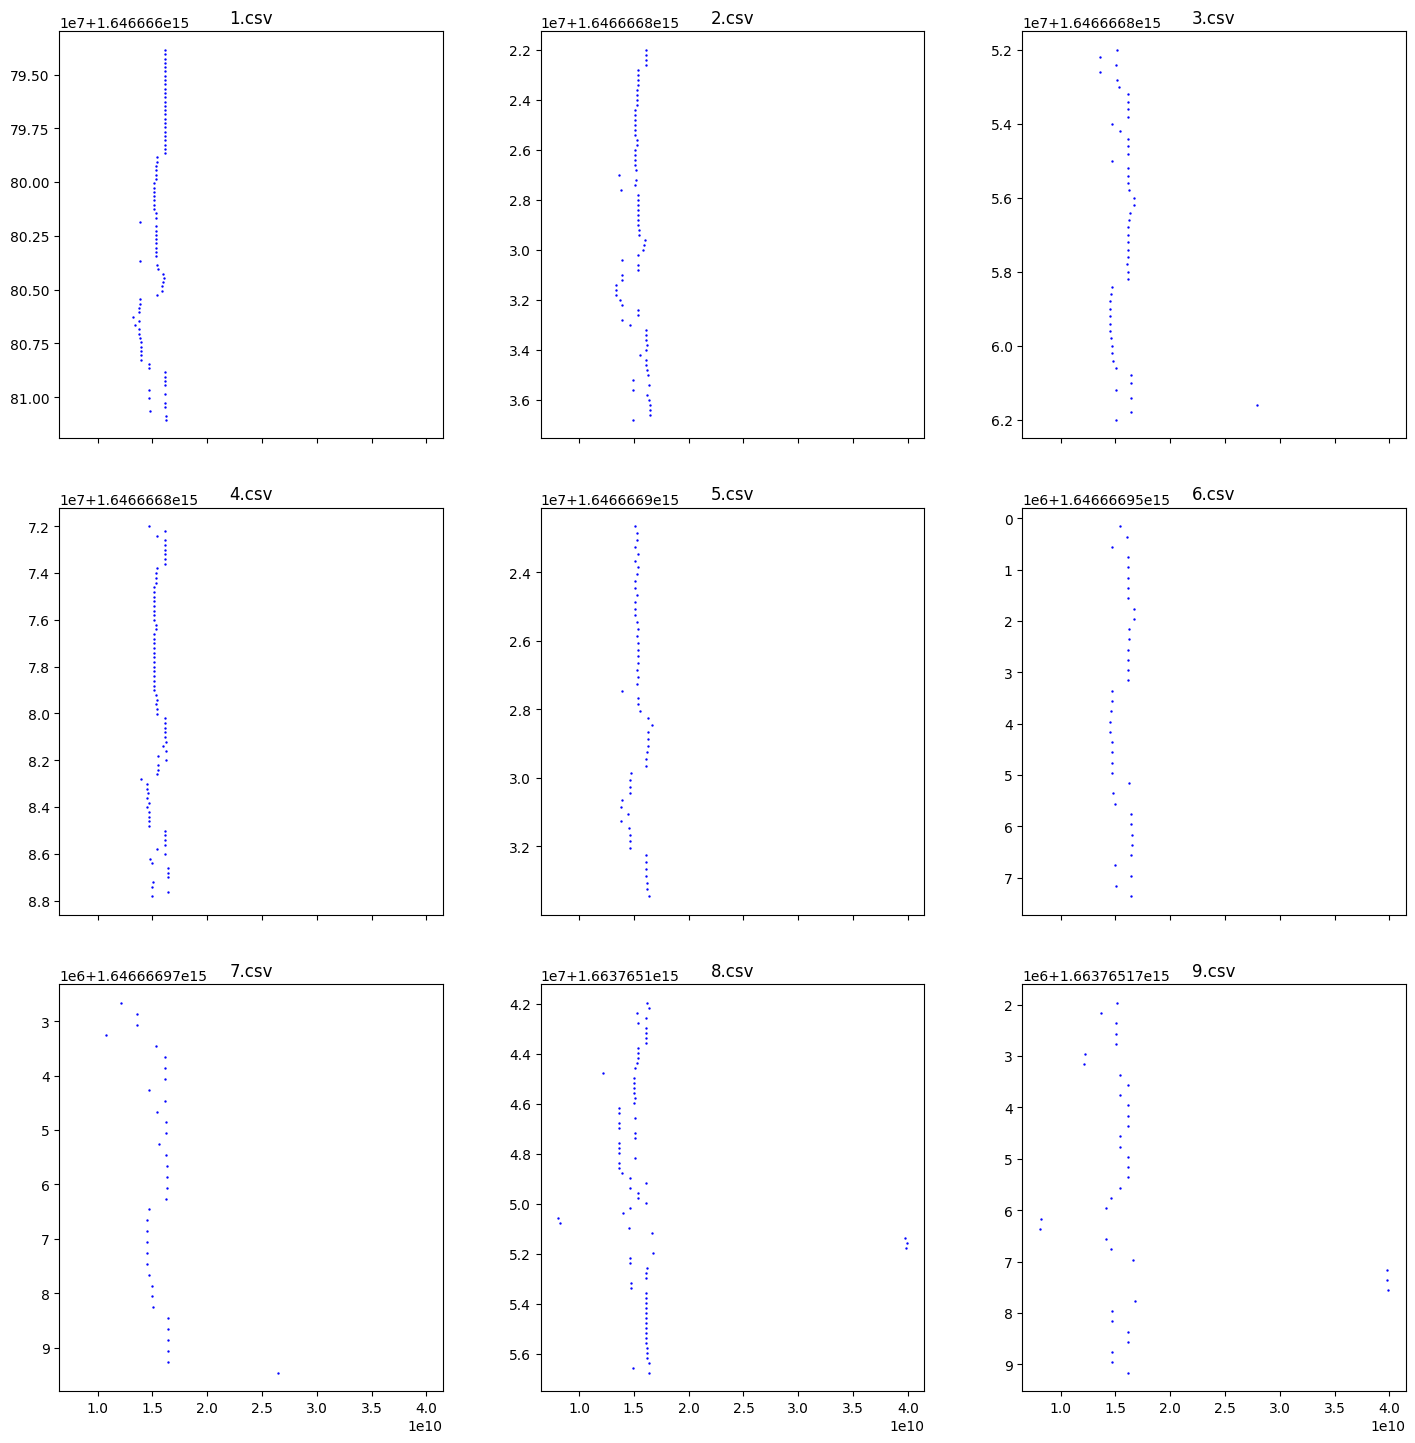

In [32]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',10,10,10000,10000,3,3)

In [33]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,colors,shapes):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    plt.gca().invert_yaxis()
    plot_index=0
    color_index = 0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        plt.scatter(x=df['morton'],y=df.index,marker=shapes[plot_index], color=colors[color_index]) 
        plot_index= plot_index+1
        if plot_index==len(shapes)-1:
            color_index=color_index+1
            plot_index=0
        
        

In [34]:
markers = ["." , "," , "o" ]
colors = ['r','g','b','c','m', 'y', 'k']

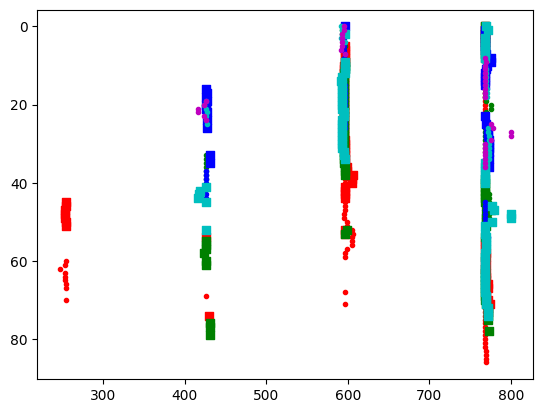

In [35]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,16,1,1,colors,markers)

In [36]:
def get_baseline_sfc_value(value1,value2):
    return m.pack(int(value1), int(value2))


In [37]:
# transfor accel_lon=0,accel_trans=0 with offset 16, multiplier 1
baseline_origin=get_baseline_sfc_value(16,16)
baseline_origin

768

In [38]:
# transfor accel_lon=-2,accel_trans=0 with offset 16, multiplier 1
baseline_lon_0_2=get_baseline_sfc_value(14,16)
baseline_lon_0_2

596

In [39]:
# transfor accel_lon=0,accel_trans=2 with offset 16, multiplier 1
baseline_trans_2=get_baseline_sfc_value(16,18)
baseline_trans_2

776

In [40]:
# transfor accel_lon=0,accel_trans=-2 with offset 16, multiplier 1
baseline_trans_0_2=get_baseline_sfc_value(16,14)
baseline_trans_0_2

424

In [41]:
# transfor accel_lon=-2,accel_trans=-2 with offset 16, multiplier 1
baseline_lon_0_2_trans_0_2=get_baseline_sfc_value(14,14)
baseline_lon_0_2_trans_0_2

252

In [42]:
# transfor accel_lon=-2,accel_trans=2 with offset 16, multiplier 1
baseline_lon_0_2_trans_2 = get_baseline_sfc_value(14,18)
baseline_lon_0_2_trans_2


604

In [43]:
baselines_list=[baseline_origin,baseline_lon_0_2,baseline_trans_0_2,baseline_trans_2,baseline_lon_0_2_trans_0_2,baseline_lon_0_2_trans_2]
baseline_color_list=['red','blue','orange','yellow','purple','green']

In [44]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis_with_baseline(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column,baseline_list,color_list):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='black',s=2)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        secax=ax[row_position,column_position].twiny()
        secax.plot(df[key1],df[ts_key],df[key2],df[ts_key])
        for i,baseline in enumerate(baseline_list):
            ax[row_position,column_position].axvline(x=baseline,color=color_list[i])
        original_list.append(secax)
        sfc_list.append(ax[row_position,column_position])
        if not(row_position==0 and column_position==0):
            secax.sharex(original_list[0])
            ax[row_position,column_position].sharex(sfc_list[0])
            
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
    

    


In [45]:
new_baselines_list=[]
for base_value_x in range(-10,10,1):
    for base_value_y in range(2,4,1):
        new_baselines_list.append(get_baseline_sfc_value(base_value_x+16,base_value_y+16))


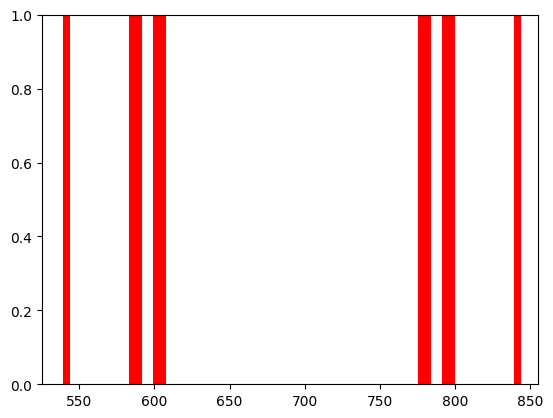

In [46]:
for baseline in new_baselines_list:
    plt.axvline(x=baseline,color="r")


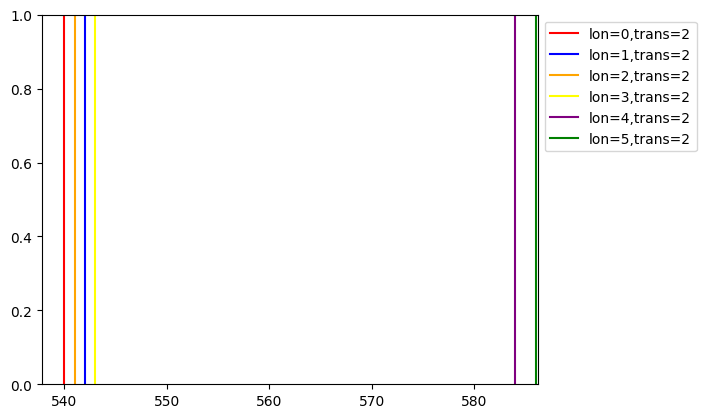

In [47]:
for i,baseline in enumerate(new_baselines_list):
    if i==0:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=0,trans=2")
    if i==1:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=1,trans=2")
    if i==2:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=2,trans=2")
    if i==3:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=3,trans=2")
    if i==4:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=4,trans=2")
    if i==5:
        plt.axvline(x=baseline,color=baseline_color_list[i],label="lon=5,trans=2")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')


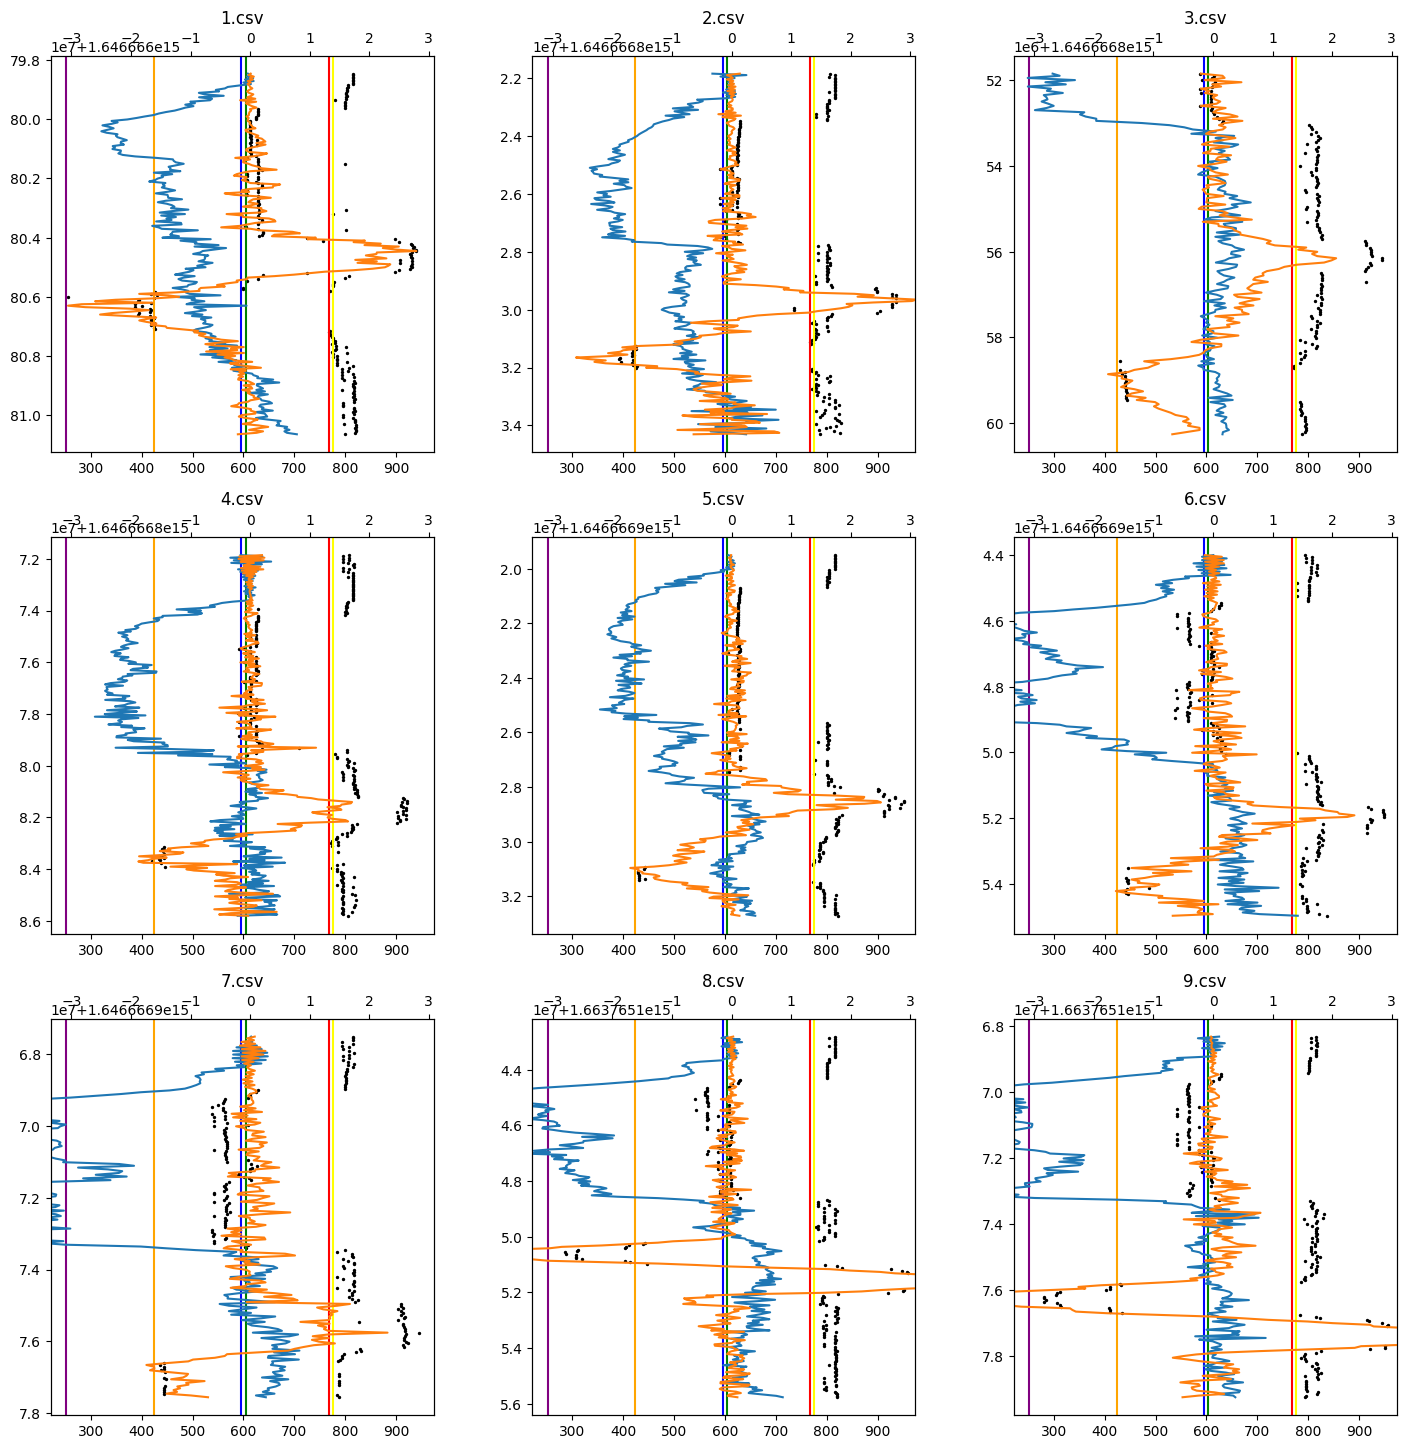

In [48]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis_with_baseline(LaneChange_Update_Path,'accel_lon','accel_trans','ts',5,5,4,4,3,3,baselines_list,baseline_color_list)

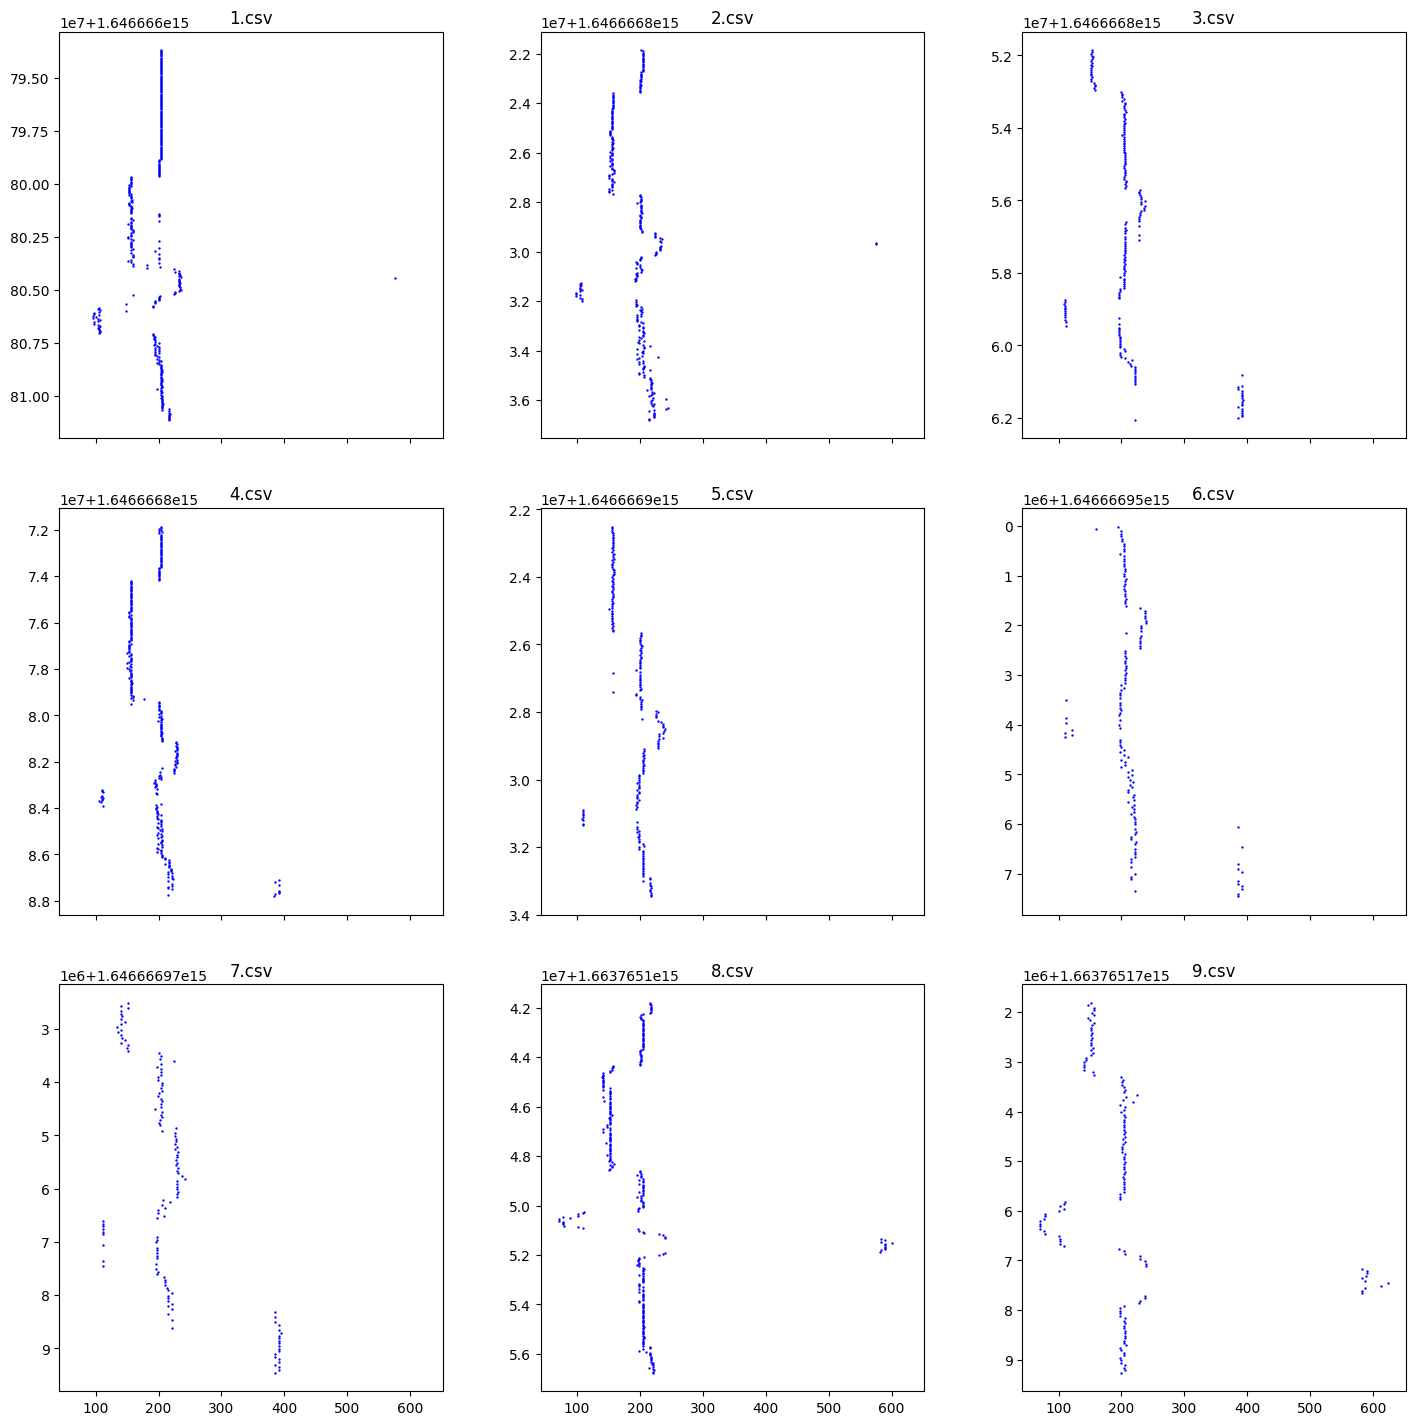

In [49]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_20hz,'accel_lon','accel_trans','ts',5,5,2,2,3,3)

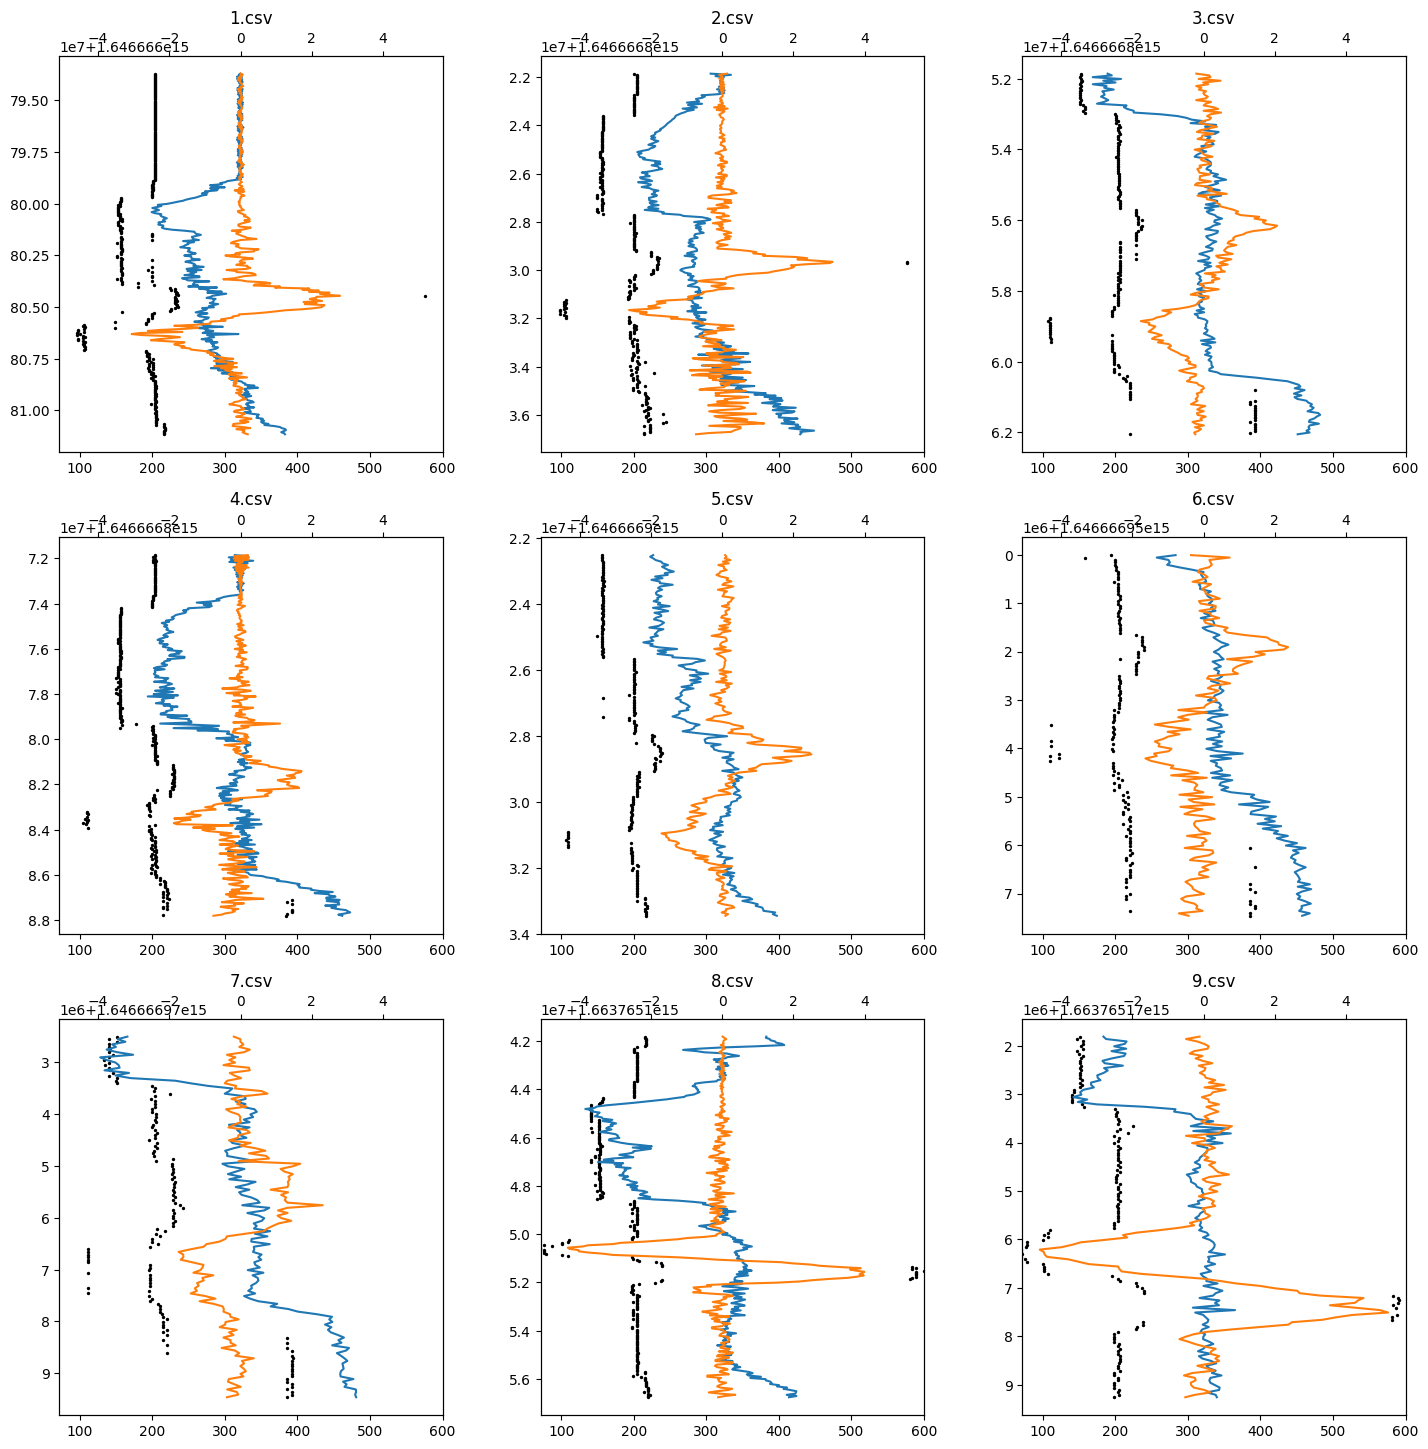

In [50]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Path_20hz,'accel_lon','accel_trans','ts',5,5,2,2,3,3)

In [51]:
test_data=m.pack(0,5)

In [52]:
bin(test_data)
test_data

34

In [53]:
test_data2=m.pack(5,0)
test_data2

17

In [54]:
def get_single_axis_in_binary_from_2D_data(morton_value,axis=0):
    # if axis=0, it return x value, 
    # if axis=1, it return y value,

    if axis==0:
        x = morton_value & 0x55555555   # to extract odd bits of num
        x=(x|(x>>1))
        x = (x | (x >> 2)) & 0x0f0f0f0f0f0f0f0f
        x = (x | (x >> 4)) & 0x00ff00ff00ff00ff
        x = (x | (x >> 8)) & 0x0000ffff0000ffff
        x = (x | (x >>16)) & 0x00000000ffffffff            
        return x
    elif axis==1:
        x = morton_value & 0xAAAAAAAA
        x = (x | (x >> 2)) & 0x0f0f0f0f0f0f0f0f
        x = (x | (x >> 4)) & 0x00ff00ff00ff00ff
        x = (x | (x >> 8)) & 0x0000ffff0000ffff
        x = (x | (x >>16)) & 0x00000000ffffffff
        return x
    else:
        print("Please choose with either 1 or 0 for axis input value")

In [55]:
get_single_axis_in_binary_from_2D_data(34,0)

0

# Normalization

In [70]:
LaneChange_Path='./data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/'
LaneChange_Path_Left ='./data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/Left_LCs/'
LaneChange_Path_Right = './data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/Right_LCs/'

In [57]:
def load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Plot(filePath,key,ts_key,threshold1,threshold2,offset1=0,offset2=0):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))

    for file in csv_files:
        df = pd.read_csv(file, sep=';', usecols = [ts_key,key])
        df=df.dropna()
        result= df.query("{0} > @threshold1 or {0} < @threshold2".format(key))
        start_index=result.index[0]+offset1
        end_index=result.index[-1]+offset2
        data=df[start_index:end_index].reset_index()
        plt.plot(data[key],data.index,label=str(file))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().invert_yaxis()


In [58]:
load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Plot(LaneChange_Path,'accel_trans','ts',1.4,-1.4)

ValueError: Usecols do not match columns, columns expected but not found: ['accel_trans']

In [ ]:
load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Plot(LaneChange_Path,'accel_trans','ts',1.4,-1.4,-10,10)

In [59]:
def add_empty_rows(df, n_empty, period):
    """ adds 'n_empty' empty rows every 'period' rows  to 'df'. 
        Returns a new DataFrame. """
    
    # to make sure that the DataFrame index is a RangeIndex(start=0, stop=len(df)) 
    # and that the original df object is not mutated. 
    df = df.reset_index(drop=True)
    
    # length of the new DataFrame containing the NaN rows
    len_new_index = len(df) + n_empty*(len(df) // period)
    # index of the new DataFrame
    new_index = pd.RangeIndex(len_new_index)
    
    # add an offset (= number of NaN rows up to that row) 
    # to the current df.index to align with new_index. 
    df.index += n_empty * (df.index
                             .to_series()
                             .groupby(df.index // period)
                             .ngroup())
    
    # reindex by aligning df.index with new_index. 
    # Values of new_index not present in df.index are filled with NaN.
    new_df = df.reindex(new_index)
    
    return new_df
# reference: https://stackoverflow.com/questions/14399689/matplotlib-drawing-lines-between-points-ignoring-missing-data

In [60]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)

In [62]:
def load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Normalize_And_Plot(filePath,key,ts_key,threshold1,threshold2,offset1=0,offset2=0,target_size=100):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))

    for file in csv_files:
        df = pd.read_csv(file, sep=';', usecols = [ts_key,key])
        df=df.dropna()
        # Comment out threshold noise clean-up
        # result= df.query("{0} > @threshold1 or {0} < @threshold2".format(key))
        # start_index=result.index[0]+offset1
        # end_index=result.index[-1]+offset2
        # data=df[start_index:end_index].reset_index()

        if len(data)>target_size:
            return 'Your original data have a size of '+str(len(data))+', which is larger then the target_size '+ str(target_size)+'Please choose another target_size'
        missing_data_count=target_size-data.shape[0]
        gcd=GCD(round(missing_data_count/10),round(len(data)/10))
        data=add_empty_rows(data,round(missing_data_count/10)/gcd,round(len(data)/10)/gcd)
        data=data.reindex(index=range(target_size))
        data=data.dropna()
        plt.plot(data[key],data.index,label=str(file))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().invert_yaxis()

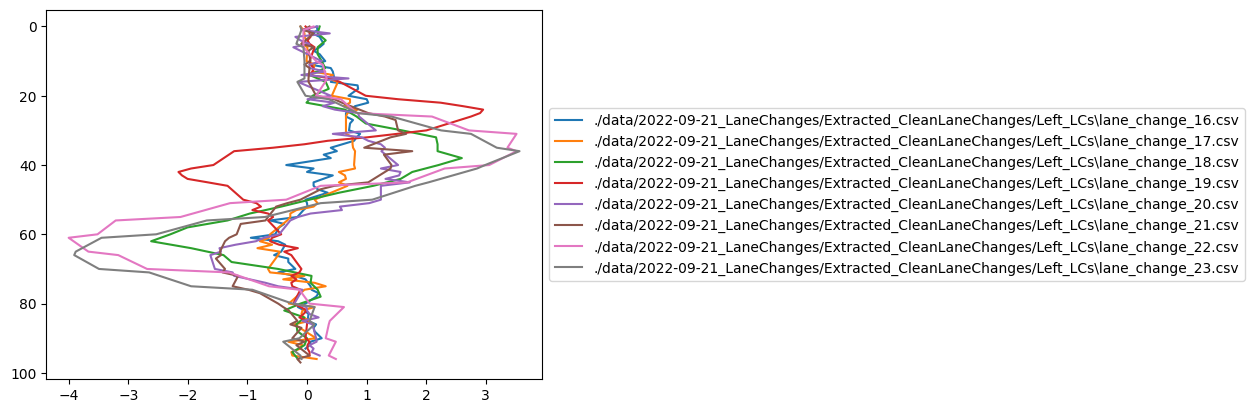

In [77]:
load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Normalize_And_Plot(LaneChange_Path_Left,'IMULatAcceleration','ts',0,0,offset1=0,offset2=0,target_size=100)

In [66]:
def load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Normalize_And_Encode_as_Morton_and_plot(filePath,key1,key2,normalize_key,ts_key,threshold1,threshold2,sfc_offset1,sfc_offset2,sfc_multiplier1,sfc_multiplier2,plot_row,plot_column,dataset_offset1=0,dataset_offset2=0,target_size=100 ):
    """key1 is by default """
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15),sharex='all')   
    fig.suptitle(filePath, fontsize=16)
 
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    for file in csv_files:
        data = pd.read_csv(file, sep=';', usecols = [ts_key,key1,key2])
        data=data.dropna()
        if(normalize_key != key1 and normalize_key!=key2):
            print('You are using a normalize key different from key1 or key2, please choose the right key to continue!')
            return
        # Comment out noise clean-up since not needed for our lane changes
        # result= df.query("{0} > @threshold1 or {0} < @threshold2".format(normalize_key))
        # start_index=result.index[0]+dataset_offset1
        # end_index=result.index[-1]+dataset_offset2
        # data=df[start_index:end_index].reset_index()

        if len(data)>target_size:
            print( 'Your original data have a size of '+str(len(data))+', which is larger then the target_size '+ str(target_size)+'Please choose another target_size')
            return
        missing_data_count=target_size-data.shape[0]
        gcd=GCD(round(missing_data_count/10),round(len(data)/10))
        data=add_empty_rows(data,round(missing_data_count/10)/gcd,round(len(data)/10)/gcd)
        data=data.reindex(index=range(target_size))
        data=data.dropna()
        data[key1+'modified']=data[key1].add(sfc_offset1)
        data[key2+'modified']=data[key2].add(sfc_offset2)
        data[key1+'modified']=data[key1+'modified'].multiply(sfc_multiplier1)
        data[key2+'modified']=data[key2+'modified'].multiply(sfc_multiplier2)
        # print(data)
        data['morton']=data.apply(set_value,args=(key1+'modified',key2+'modified'),axis=1)
        ax[row_position,column_position].scatter(x=data['morton'],y=data.index,c='red',s=5)
        ax[row_position,column_position].set_title(file[-6:])
        ax[row_position,column_position].invert_yaxis()
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
        
        

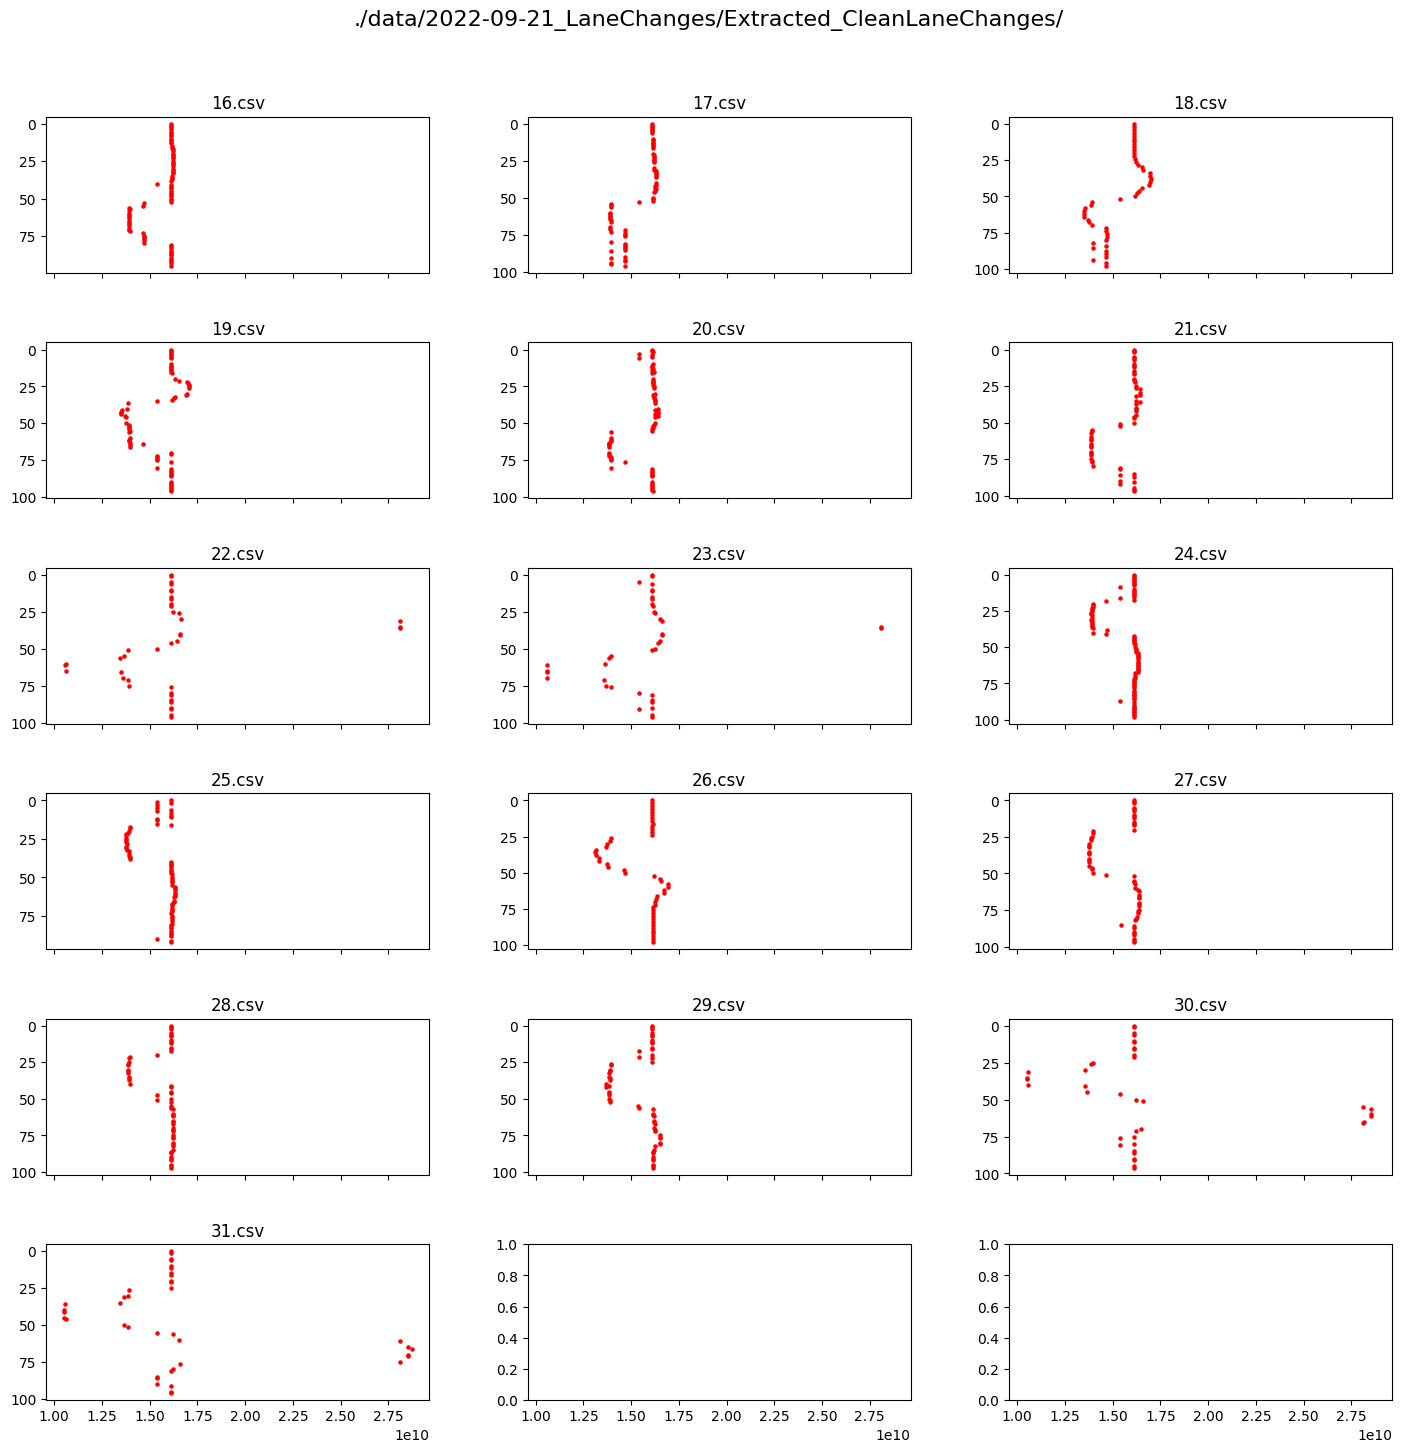

In [67]:
OFFSET = 10
FACTOR_MULTIPLIER = 10000
# load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Normalize_And_Encode_as_Morton_and_plot(filePath,key1,key2,normalize_key,ts_key,threshold1,threshold2,sfc_offset1,sfc_offset2,sfc_multiplier1,sfc_multiplier2,plot_row,plot_column,dataset_offset1=0,dataset_offset2=0,target_size=100 )
load_All_Files_In_Subfolder_Then_Select_With_Thresholds_And_Normalize_And_Encode_as_Morton_and_plot(LaneChange_Path,'IMULatAcceleration','SteeringWhlAngle','IMULatAcceleration','ts',0,0,OFFSET,OFFSET,FACTOR_MULTIPLIER,FACTOR_MULTIPLIER,6,3,0,0,100)

# Roundabout

In [65]:
ReferenceRoundaboutPath='../SnowFox scripts/SnowFox-Roundabout-Dataset/reference-roundabout/'